In [34]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras import Sequential
from tensorflow.keras.losses import BinaryCrossentropy

# global settings
sns.set_style('darkgrid')
%matplotlib inline

In [3]:
X, y = datasets.make_circles(n_samples=2000, noise=0.001)

In [4]:
X

array([[ 0.49423972, -0.62980496],
       [-0.76532581,  0.23915646],
       [ 0.55900506, -0.57321422],
       ...,
       [-0.63825698, -0.77131475],
       [-0.26041597, -0.96613551],
       [ 0.78505091,  0.15922753]])

In [16]:
# make a dataset with the data obtained
circles = {
    "X0":X[:, 0],
    "X1":X[:, 1],
    "label": y
}
circles_df = pd.DataFrame(circles)

In [17]:
circles_df

,X0,X1,label
0,0.494240,-0.629805,1
1,-0.765326,0.239156,1
2,0.559005,-0.573214,1
3,0.406459,-0.687187,1
4,0.073240,-0.996369,0
...,...,...,...
1995,0.789055,0.126007,1
1996,-0.293719,-0.743950,1
1997,-0.638257,-0.771315,0
1998,-0.260416,-0.966136,0


<Axes: xlabel='X0', ylabel='X1'>

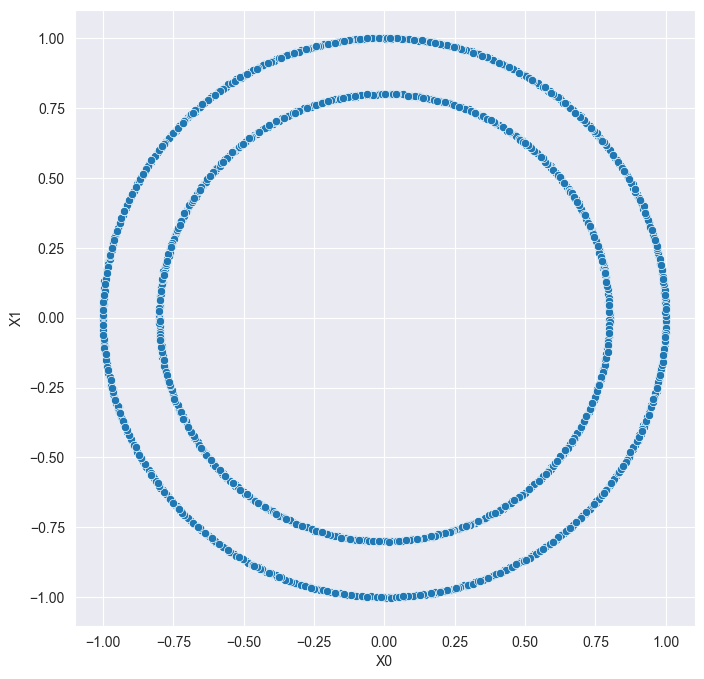

In [29]:
# Visualizing the data
plt.figure(figsize=(8,8))
sns.scatterplot(data=circles_df, x='X0', y='X1')

<Axes: xlabel='X0', ylabel='X1'>

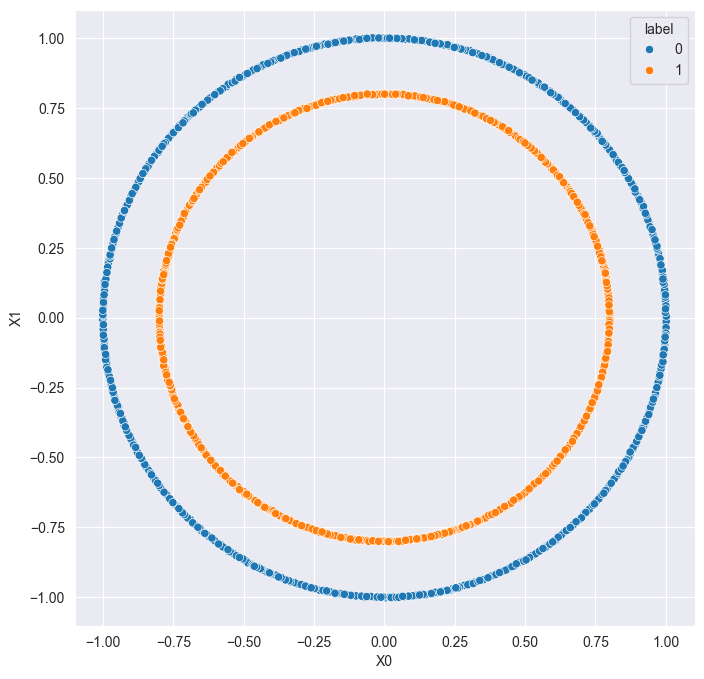

In [24]:
# using the label as hue for the circle
# Visualizing the data
plt.figure(figsize=(8,8))
sns.scatterplot(data=circles_df, x='X0', y='X1', hue='label')

In [27]:
X[0]

array([ 0.49423972, -0.62980496])

In [32]:
# splitting data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# building classification models to predict the labels of points given

In [38]:
# create the sequential model

# set random seed
tf.random.set_seed(42)

model_1 = Sequential([
    Input(shape=X[0].shape),
    Dense(1, name='hidden_layer')
])

# compile the model
model_1.compile(
    loss=BinaryCrossentropy,
    optimizer=SGD(),
    metrics=['accuracy']
)

model_1.fit(X_train,y_train, batch_size=50, epochs=100)
# get model summary
model_1.summary()

Epoch 1/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.4884 - loss: 6.2492
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5002 - loss: 5.8652 
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5212 - loss: 4.9810
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5160 - loss: 4.3194
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4693 - loss: 4.6502
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5311 - loss: 4.0356
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5157 - loss: 2.6303
Epoch 8/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5158 - loss: 0.7145
Epoch 9/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5093 - loss: 0.6997
Epoch 10/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5016 - loss: 0.6958
Epoch 11/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5052 - loss: 0.6944
Epoch 12/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden_layer (Dense)            │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5 (24.00 B)

 Trainable params: 3 (12.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [39]:
# evaluate the model on the test dataset
model_1.evaluate(X_test, y_test)

13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4782 - loss: 0.6948  


[0.6949840784072876, 0.4625000059604645]